# Data Exploration & EDA

In [27]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings

In [3]:
# import dataset
data = pd.read_csv('../data/raw/raw_dataset.csv')
df = data

print(f"\nFirst few rows:")
df.head()


First few rows:


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


# Dataset Summary/ Overview
The dataset contains 37,438 entries and 19 features, representing user-level information collected from Twitter. 
Each row corresponds to a unique user account, and the columns capture both profile metadata and activity metrics.
- Data types: 4 boolean, 6 integer, 1 float, and 8 object (string-like) columns.

In [4]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (37438, 19)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    37438 non-null  object 
 1   default_profile               37438 non-null  bool   
 2   default_profile_image         37438 non-null  bool   
 3   description                   30181 non-null  object 
 4   favourites_count              37438 non-null  int64  
 5   followers_count               37438 non-null  int64  
 6   friends_count                 37438 non-null  int64  
 7   geo_enabled                   37438 non-null  bool   
 8   id                            37438 non-null  int64  
 9   lang                          29481 non-null  object 
 10  location                      37434 non-null  object 
 11  profile_background_image_url  32939 non-null  object 
 12  profile_image_url             37437 non-null  object 
 13  s

In [6]:
# Get descriptive statistics in 2D table form
desc = df.drop(columns=['id'], index=1, inplace=False).describe()

# Ensure full display without truncation
pd.set_option('display.float_format', '{:.2f}'.format)  # Avoid scientific notation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # No line wrapping

print(desc)

       favourites_count  followers_count  friends_count  statuses_count  \
count          37437.00         37437.00       37437.00        37437.00   
mean           12302.38        370319.70        4446.02        21073.94   
std            33924.05       2470861.75       49545.86        67330.58   
min                0.00             0.00           0.00            0.00   
25%              362.00            35.00          37.00         1337.00   
50%             2066.00           365.00         296.00         4209.00   
75%             8879.00          8443.00         893.00        17154.00   
max           885123.00     121641473.00     4343060.00      2771910.00   

       average_tweets_per_day  account_age_days  
count                37437.00          37437.00  
mean                     6.89           3022.17  
std                     24.58           1013.67  
min                      0.00            483.00  
25%                      0.49           2317.00  
50%                     

Next, we took a look at the number of missing values and duplicated rows in the dataset. It is observed that 2.77% (19718) of our total data is missing, but nearly 31% of the rows contain at least one missing field. Additionally, we noticed that missing values are only found in 5 out of 19 columns, with a significant number of missing values only for `description`, `lang`, and `profile_background_image_url`. We believe the missing values are due to reasons like:
- `description` : users having blank bios (can be imputed with empty strings)
- `lang` : derived from `description` , as such missing values are due to empty description or bios with just numbers, emojis, links or punctuation (can be imputed as unknown). 
- `profile_background_image_url` : users without custom background images; can be treated as "default".

In [7]:
# check for missing values in columns
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Missing Data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

missing_rows_pct = (df.isnull().any(axis=1).sum() / len(df)) * 100
print(f"Rows with at least one missing value: {missing_rows_pct:.2f}%")

print(f'\nNumber of rows with Missing Data in each Column:')
print(df.isnull().sum())


Total Missing Values: 19718
Percentage of Missing Data: 2.77%
Rows with at least one missing value: 30.85%

Number of rows with Missing Data in each Column:
created_at                         0
default_profile                    0
default_profile_image              0
description                     7257
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           4
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64


In [8]:
df2 = df[~df['description'].isnull()]
df2[df2['lang'].isnull()]['description'].head(10)

47                                               656
60                                             19 🤟🏼
178                                             ....
235                                              😗✌🏻
266                                           🏳️‍🌈🇲🇽
326                                           🧘🏽‍♂️🌞
353    http://t.co/68reo3QGLu http://t.co/kSd0WDXXDn
388                                         300/3000
490                          https://t.co/5rVvVSd6Cs
507                                             ✌❤😷😍
Name: description, dtype: object

No duplicated rows are observed, and no preprocessing step will be needed to remove any duplicated rows.

In [9]:
# check for duplicated rows
print(f'Number of Duplicated rows: {df.duplicated().sum()}')

Number of Duplicated rows: 0


# Data Cleaning
As seen above, we will impute missing values in the metadata fields with the appropriate values. As for `location` and `profile_image_url`, less than 0.1% of rows have missing values; these can be considered negligible and will be imputed with "Unknown" to prevent issues during analysis or modeling.

In [10]:
# fill NaN with appropriate values
df['description'] = df['description'].fillna('""')
df['lang'] = df['lang'].fillna('unknown') 
df['profile_background_image_url'] = df['profile_background_image_url'].fillna('default') 

df['location'] = df['location'].fillna('unknown') 
df['profile_image_url'] = df['profile_image_url'].fillna('unknown') 

# Exploratory Data Analysis

## Account Type Distribution

Approximately 66.8% of the dataset are tagged as human accounts, while bots account for 33.2%. The class balance ratio is about 2.01:1 (humans to bots), indicating a moderate class imbalance. Since the classes are not perfectly balanced, some machine learning models may be biased toward the majority class (human). Techniques such as class weighting, resampling methods (e.g., SMOTE) may be considered to address this imbalance during training.

C:\Users\CelesteN\AppData\Local\Temp\ipykernel_20788\3627353541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_counts.index, y=account_counts.values, palette='viridis')


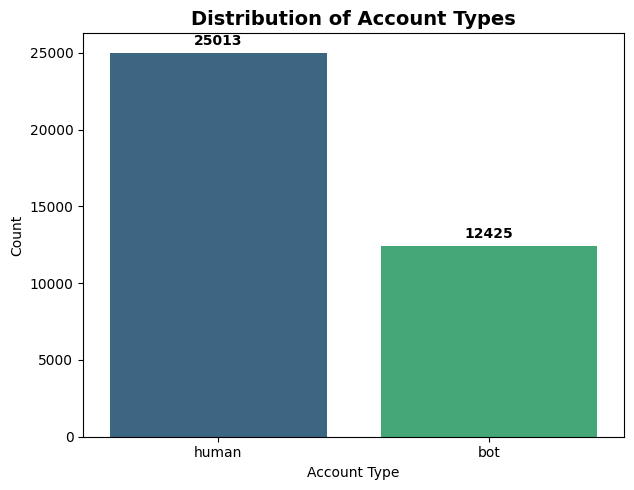


Account Type Distribution:
account_type
human    25013
bot      12425
Name: count, dtype: int64

Class Balance Ratio: 2.01:1


In [11]:
# Distribution of account types (bot vs human)
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 2, 1)
account_counts = df['account_type'].value_counts()
sns.barplot(x=account_counts.index, y=account_counts.values, palette='viridis')
plt.title('Distribution of Account Types', fontsize=14, fontweight='bold')
plt.xlabel('Account Type')
plt.ylabel('Count')
for i, v in enumerate(account_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()

print(f"\nAccount Type Distribution:")
print(account_counts)
print(f"\nClass Balance Ratio: {account_counts.values[0]/account_counts.values[1]:.2f}:1")

## Correlation Analysis
### Numerical Features
We first examine correlations between numeric features to understand how they relate to each other, identify multicollinearity, and detect redundant or highly dependent variables that may affect model performance. 

It is observed that `average_tweets_per_day` and `statuses_count` are highly correlated (0.93), which is expected as `statuses_count` is the total number of tweets and more average tweets per day will definitely lead to a higher overall number of tweets. Other numeric features exhibit much weaker relationships, with the next highest correlations at 0.28 for `favourites_count` and `statuses_count` and 0.26 for `favourites_count` and `average_tweets_per_day`. This suggests that we could consider dropping either columns `statuses_count` and `average_tweets_per_day`, while the remaining features are largely independent and provide unique information;

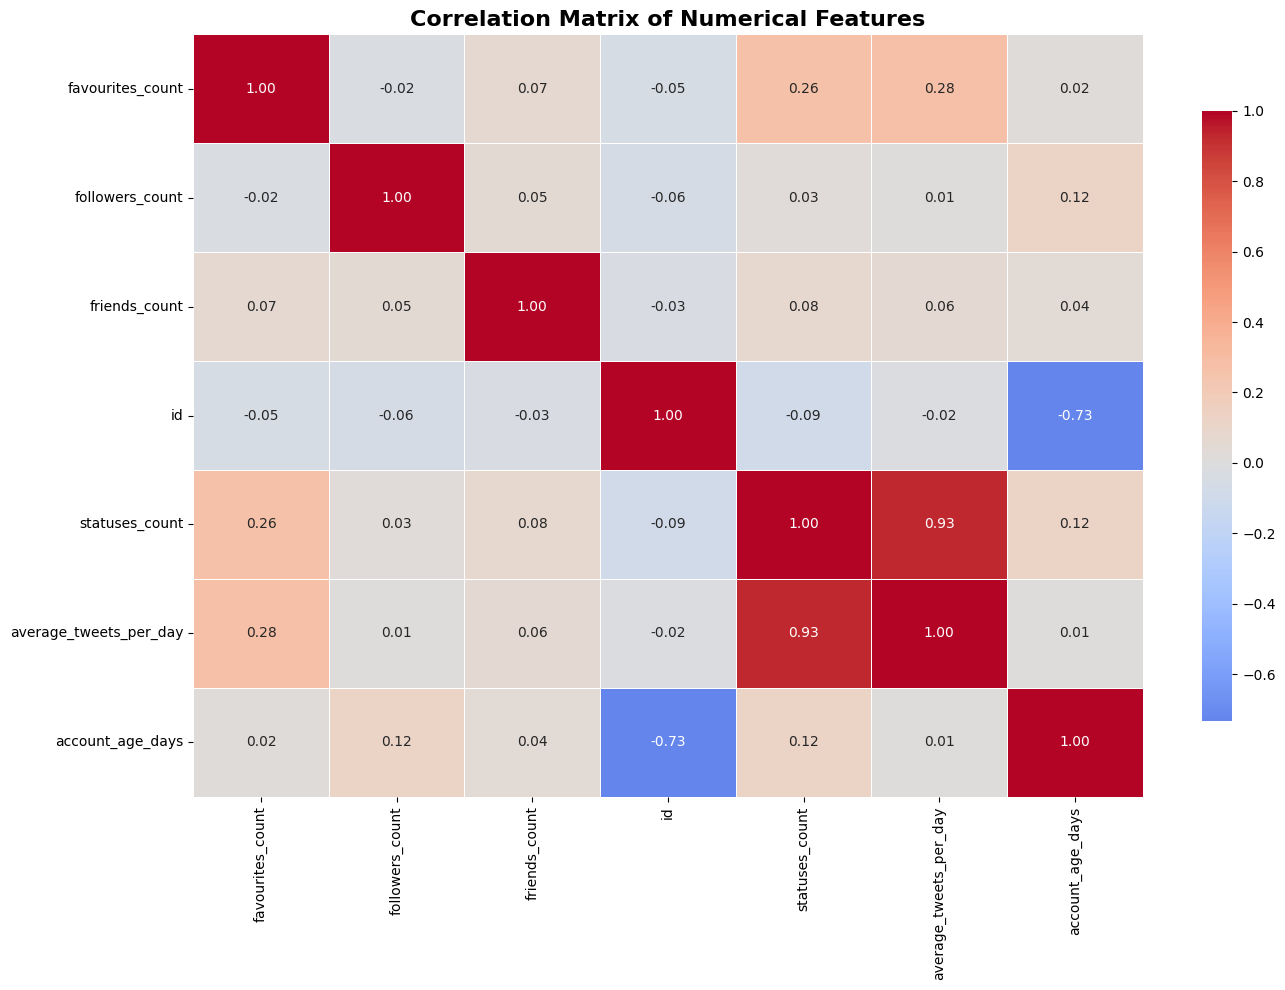


Highly Correlated Features (|r| > 0.7):
id <-> account_age_days: -0.731
statuses_count <-> average_tweets_per_day: 0.929


In [12]:
# Define numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

print("\nHighly Correlated Features (|r| > 0.7):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

### Numerical Feature Correlation with Account Types
Next, we computed the correlation between our features and our target variable (changed to `is_bot` for analysis below) using spearman correlation, which is particularly useful in capturing non-linear relationships based on rank ordering, and is important for features like counts that can be heavily skewed.

All numerical features show negative correlations with is_bot, meaning that higher values of these features are generally associated with non-bot accounts. The strongest negative correlation is observed with `followers_count` (-0.50), suggesting that bots tend to have fewer followers. Features like `friends_count` (-0.43) and `favourites_count` (-0.32) also show notable negative correlations. `account_age_days` and `average_tweets_per_day` have weaker negative correlations, indicating a moderate relationship with the likelihood of being a bot.

These insights can guide feature selection and model interpretation, helping us understand which account characteristics are most indicative of bot behavior.

is_bot                    1.00
id                        0.23
account_age_days         -0.23
average_tweets_per_day   -0.27
statuses_count           -0.30
favourites_count         -0.32
friends_count            -0.43
followers_count          -0.50
Name: is_bot, dtype: float64


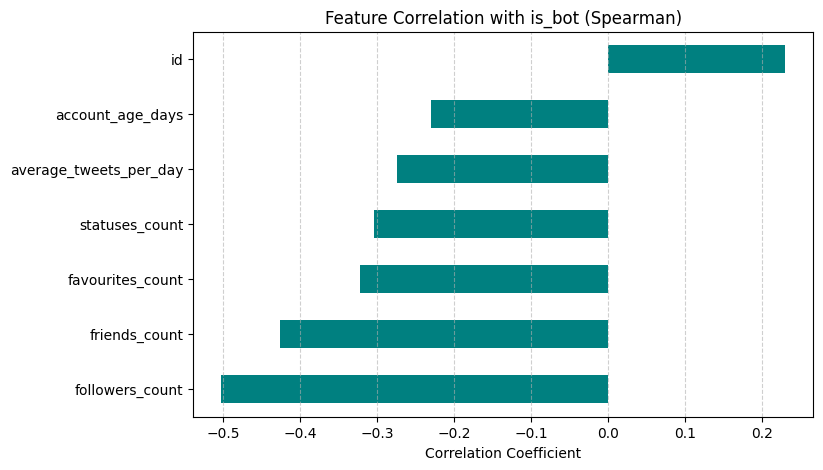

In [13]:
df2 = df.copy()

df2['is_bot'] = df2['account_type'].str.lower().map({'bot': 1, 'human': 0})

numeric_df = df2.select_dtypes(include=[np.number]).copy()
corr = numeric_df.corr(method='spearman')
corr_with_target = corr['is_bot'].sort_values(ascending=False)
print(corr_with_target)

plt.figure(figsize=(8,5))
corr_with_target.drop('is_bot').sort_values().plot(kind='barh', color='teal')
plt.title("Feature Correlation with is_bot (Spearman)")
plt.xlabel("Correlation Coefficient")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

## Outlier Detection
We applied the Interquartile Range (IQR) method to identify outliers for each numerical feature, where outliers are data points lying beyond 1.5 × IQR from the first or third quartile.

Most features show significant outlier percentages. While outliers might be extreme, they are valid values (e.g., very popular accounts with thousands/ millions of followers or very active accounts like media accounts). Removal of outliers is thus not recommended, since it could remove important information about highly active accounts. Instead, we can consider transformations (log scale) for skewed features if needed.

`account_age_days` has no detected outliers, indicating all accounts fall within a consistent age range.

Except for `followers_count`, bot accounts has a higher percentage of extreme values for other features when compared to human accounts. This could suggest a possible relationship that bot accounts tend to have fewer followers but higher activity, which may be useful for modeling and feature interpretation.

Outlier Detection by Account Type (IQR Method)

BOT Accounts:
               Feature  Outliers  Outlier_%
                    id      2448      19.70
       followers_count      2184      17.58
        statuses_count      2057      16.56
average_tweets_per_day      2012      16.19
         friends_count      1834      14.76
      favourites_count      1025       8.25
      account_age_days         0       0.00

HUMAN Accounts:
               Feature  Outliers  Outlier_%
       followers_count      5181      20.71
                    id      3159      12.63
      favourites_count      2957      11.82
         friends_count      2786      11.14
average_tweets_per_day      2594      10.37
        statuses_count      2549      10.19
      account_age_days         0       0.00


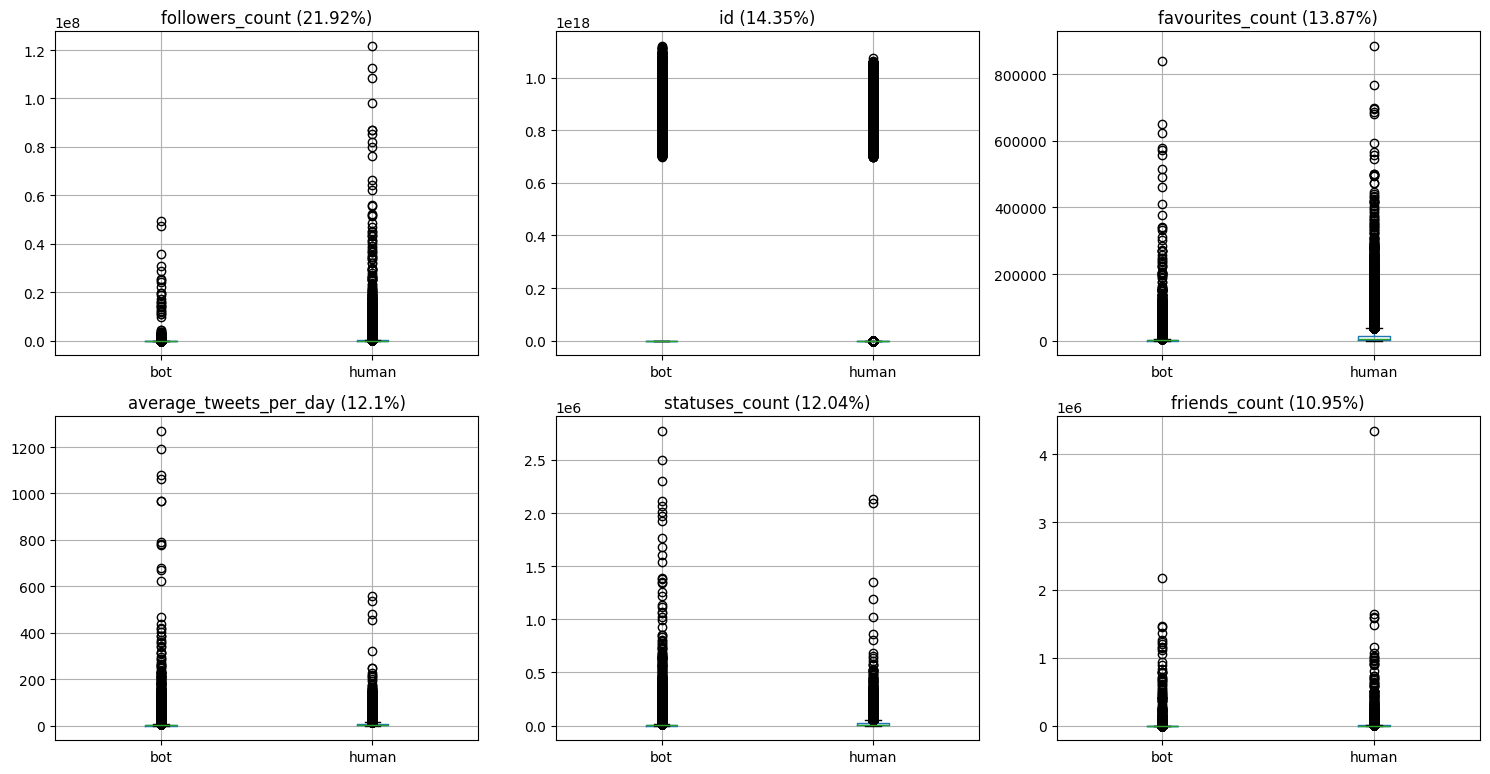

In [14]:
# IQR method by account type
print("Outlier Detection by Account Type (IQR Method)")
print("="*80)

for account in ['bot', 'human']:
    df_account = df[df['account_type'] == account]
    outlier_summary = []
    
    for feature in numerical_features:
        Q1, Q3 = df_account[feature].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outlier_count = ((df_account[feature] < lower) | (df_account[feature] > upper)).sum()
        
        outlier_summary.append({
            'Feature': feature,
            'Outliers': outlier_count,
            'Outlier_%': round(outlier_count / len(df_account) * 100, 2)
        })
    
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_%', ascending=False)
    print(f"\n{account.upper()} Accounts:")
    print(outlier_df.to_string(index=False))

# Visualize top 6 features with most outliers (combined)
outlier_summary_all = []
for feature in numerical_features:
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_count = ((df[feature] < lower) | (df[feature] > upper)).sum()
    outlier_summary_all.append({'Feature': feature, 'Outlier_%': round(outlier_count / len(df) * 100, 2)})

outlier_df_all = pd.DataFrame(outlier_summary_all).sort_values('Outlier_%', ascending=False)
top_features = outlier_df_all.nlargest(6, 'Outlier_%')['Feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    df.boxplot(column=feature, by='account_type', ax=axes[idx])
    axes[idx].set_title(f'{feature} ({outlier_df_all[outlier_df_all["Feature"]==feature]["Outlier_%"].values[0]}%)')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()

## Distribution of Boolean Features
Some boolean features might be potential identifiers for bot accounts, and might be useful modelling features:

- `default_profile`: 62.3% of bot accounts use the default profile, compared to only 31.9% of human accounts, indicating a strong association with bot behavior.
- `geo_enabled`: 78.1% of bots have location disabled versus 42.1% of humans, suggesting that bots are less likely to enable geolocation.
- `verified`: 97.5% of bots are not verified, while 71.1% of humans are also unverified. We can infer that most bots are likely to be unverified, however, the relationship is weaker as the distribution of verified accounts are similar for human accounts with a large portion of humans being unverified as well.
 
`default_profile_image`: Distribution is similar across account types, with 96.9% of bots and 99.3% of humans not using the default profile image, indicating this feature is less informative.

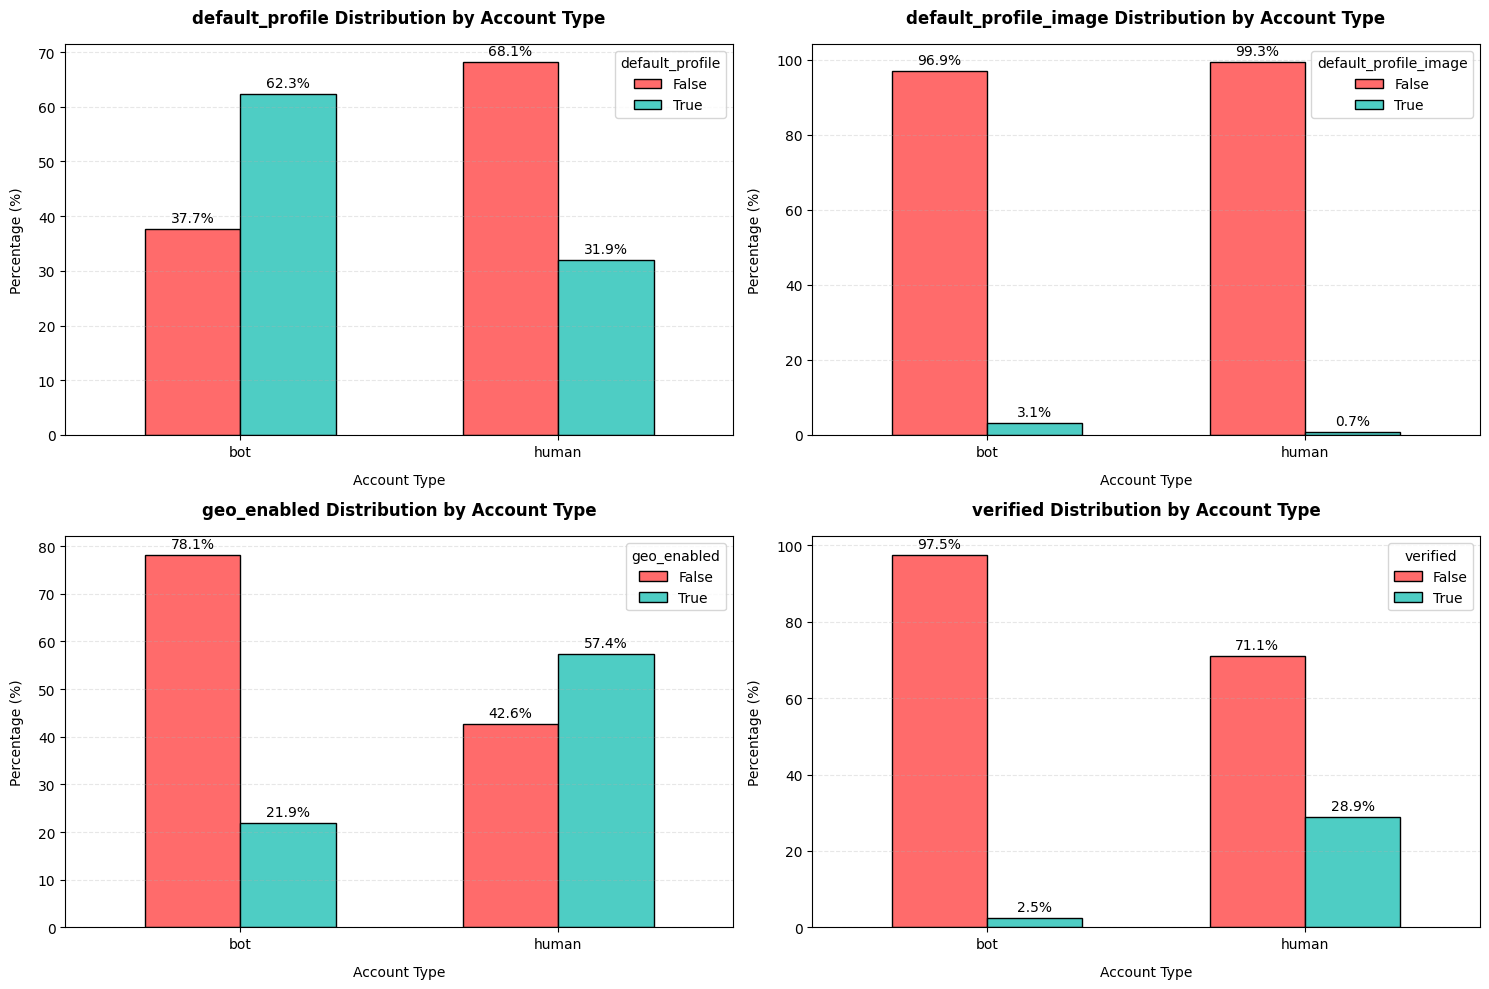

In [15]:
# Boolean features analysis
boolean_features = ['default_profile', 'default_profile_image', 'geo_enabled', 'verified']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(boolean_features):
    # Create cross-tabulation
    ct = pd.crosstab(df['account_type'], df[feature], normalize='index') * 100
    
    # Plot bars
    ct.plot(kind='bar', ax=axes[idx], color=['#FF6B6B', '#4ECDC4'], edgecolor='black', width=0.6)
    
    axes[idx].set_title(f'{feature} Distribution by Account Type', fontsize=12, fontweight='bold', pad=15)
    axes[idx].set_xlabel('Account Type', labelpad=10)
    axes[idx].set_ylabel('Percentage (%)', labelpad=10)
    axes[idx].legend(title=feature, labels=['False', 'True'], loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

    # Add percentages above bars
    for p in axes[idx].patches:
        height = p.get_height()
        if height > 0:  # only annotate bars with height > 0
            axes[idx].annotate(f'{height:.1f}%', 
                               (p.get_x() + p.get_width() / 2, height), 
                               ha='center', va='bottom', 
                               fontsize=10, color='black', xytext=(0,3), textcoords='offset points')

plt.tight_layout()  # add extra spacing between subplots
plt.show()


## Distribution of Account Language
We also analyzed whether the language of an account signals if it is a bot. Since there are 49 possible languages with the majority of languages being English (57.29%) and Unknown (21.25%), we decided to only take a look at the top 15 languages and group the other languages into Others only for this analysis.

In [16]:
print(df['lang'].value_counts(dropna=False, normalize=True).head(15) * 100)

lang
en        57.29
unknown   21.25
es         3.24
pt         1.88
it         1.70
ar         1.59
de         1.43
ja         1.01
fr         1.00
af         0.89
id         0.84
ru         0.67
tr         0.59
ca         0.53
tl         0.51
Name: proportion, dtype: float64


In [17]:
# only plot top 15 languages, group the rest into others
top_languages = df['lang'].value_counts().nlargest(15).index
df['lang_grouped'] = df['lang'].apply(lambda x: x if x in top_languages else 'others')

From below, we observ that English dominates 64.8% of human accounts, indicating that majority of humans use an English account.

Meanwhile, bots show a more even split between English (42.2%) and the 'unknown' category (36.2%), indicating that many bots either use English accounts or do not specify a language for their accounts.

More than 75% of both humans and bots account are using either an English or one with unspecified language. 

Certain languages such as Arabic (ar, 3.0%) and Afrikaans (af, 1.7%) are proportionally higher among bots than humans, which might suggest region-specific bot activity or automated accounts using less common languages. However, these proportions are relatively small, and may not be significant enough to draw conclusions.

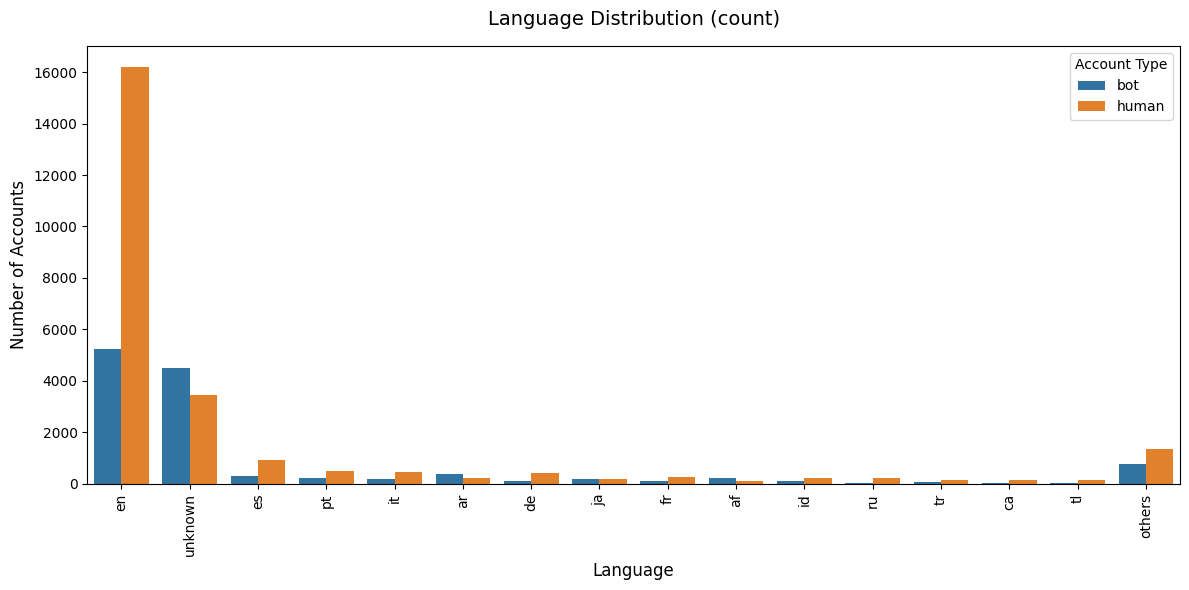

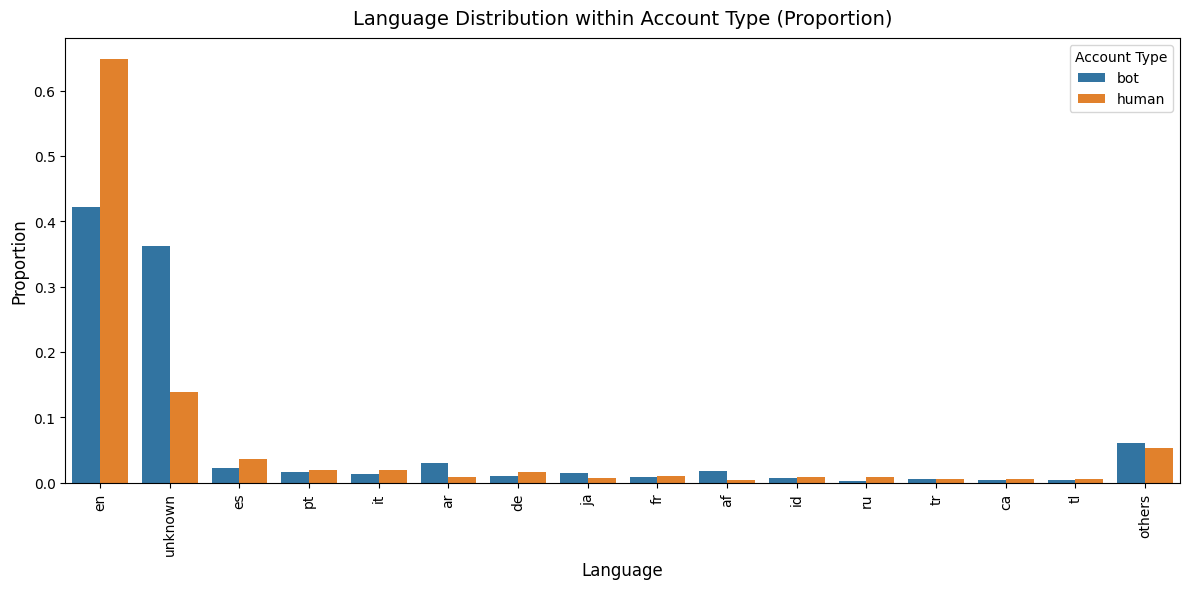

In [18]:
# counts
lang_counts = (
    df.groupby(['lang_grouped', 'account_type'])
    .size()
    .reset_index(name='count')
)

lang_order = (
    df['lang_grouped'].value_counts()
    .sort_values(ascending=False)
    .index.tolist()
)
if 'others' in lang_order:
    lang_order = [lang for lang in lang_order if lang != 'others'] + ['others']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lang_counts,
    x='lang_grouped', y='count', hue='account_type',
    order=lang_order,
    dodge=True
)
plt.title("Language Distribution (count)", fontsize=14, pad=15)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Number of Accounts", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Account Type", loc='upper right')
plt.tight_layout()
plt.show()

# proportions 
lang_distribution = (
    df.groupby('account_type')['lang_grouped']
    .value_counts(normalize=True)
    .reset_index(name='proportion')
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lang_distribution,
    x='lang_grouped', y='proportion',
    hue='account_type',
    order=lang_order,
    dodge=True
)

plt.title("Language Distribution within Account Type (Proportion)", fontsize=14, pad=10)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Account Type", loc='upper right')
plt.tight_layout()
plt.show()

In [19]:
lang_distribution = (
    df.groupby('account_type')['lang_grouped']
    .value_counts(normalize=True)
    .reset_index(name='proportion')
)

lang_table = (
    lang_distribution
    .pivot(index='lang_grouped', columns='account_type', values='proportion')
    .fillna(0)
)

lang_table = lang_table.round(3)

if 'bot' in lang_table.columns:
    lang_table = lang_table.sort_values(by='bot', ascending=False)

print("Language Distribution Table (only Proportion within account types)")
print(lang_table)

Language Distribution Table (only Proportion within account types)
account_type  bot  human
lang_grouped            
en           0.42   0.65
unknown      0.36   0.14
others       0.06   0.05
ar           0.03   0.01
es           0.02   0.04
pt           0.02   0.02
af           0.02   0.01
ja           0.01   0.01
it           0.01   0.02
de           0.01   0.02
fr           0.01   0.01
id           0.01   0.01
tr           0.01   0.01
ca           0.00   0.01
tl           0.00   0.01
ru           0.00   0.01


English (en) has 5,238 bots vs 16,212 humans, giving a bot_% of 24.42% and human_% of 75.58%, resulting in a strong human dominance (-51.16%).

The 'unknown' category is bot dominated, with 4,493 bots vs 3,464 humans (bot_dominance = +12.94%).

Arabic (ar) and Afrikaans (af) show positive bot dominance, indicating these languages are disproportionately used by bots compared to humans. Languages like Spanish (es), Portuguese (pt) and Italian (it) have strong negative bot dominance, reflecting human prevalance. These languages may be key differentiators between bots and humans. 

In [20]:
lang_distribution = (
    df.groupby(['account_type', 'lang_grouped'])
    .size()
    .reset_index(name='count')
)

lang_table = (
    lang_distribution
    .pivot(index='lang_grouped', columns='account_type', values='count')
    .fillna(0)
    .astype(int)
)

if 'bot' in lang_table.columns:
    lang_table = lang_table.sort_values(by='bot', ascending=False)

lang_table['total'] = lang_table.sum(axis=1)

if 'bot' in lang_table.columns:
    lang_table['bot_%'] = (lang_table['bot'] / lang_table['total'] * 100).round(2)
if 'human' in lang_table.columns:
    lang_table['human_%'] = (lang_table['human'] / lang_table['total'] * 100).round(2)

if 'bot_%' in lang_table.columns and 'human_%' in lang_table.columns:
    lang_table['bot_dominance'] = (lang_table['bot_%'] - lang_table['human_%']).round(2)

print("Language Distribution Table:\n")
print(lang_table.sort_values(by='total', ascending=False))

Language Distribution Table:

account_type   bot  human  total  bot_%  human_%  bot_dominance
lang_grouped                                                   
en            5238  16212  21450  24.42    75.58         -51.16
unknown       4493   3464   7957  56.47    43.53          12.94
others         748   1340   2088  35.82    64.18         -28.36
es             287    926   1213  23.66    76.34         -52.68
pt             206    498    704  29.26    70.74         -41.48
it             168    469    637  26.37    73.63         -47.26
ar             378    216    594  63.64    36.36          27.28
de             125    411    536  23.32    76.68         -53.36
ja             187    191    378  49.47    50.53          -1.06
fr             104    271    375  27.73    72.27         -44.54
af             214    119    333  64.26    35.74          28.52
id              97    216    313  30.99    69.01         -38.02
ru              27    223    250  10.80    89.20         -78.40
tr        

Above shows that English dominates human accounts (64.8%), while a large proportion of bots (36.2%) have no specified language set. Together, more than 75% of all accounts, both human and bot, use either English or an unspecified language, highlighting that these two categories cover the majority of the accounts. 

Certain less common languages such as Arabic (ar, 3.0%) and Afrikaans (af, 1.7%) appear proportionally more among bots than humans, even though their absolute counts are relatively small. Our table confirms these patterns, showing that 'unknown' and some niche languages are bot-heavy, whereas English, Spanish, Portuguese, and Italian are predominantly human. These observations provide an initial overview of language distributions across account types and may be able to guide further analysis.

## Relationship between `account_type` and the following extracted features from `description`
- `length`
- `word_count`
- `mean_word_length`
- `mean_sent_length`
- `hashtag_count`
- `handle_count`
- `url_count`

In [21]:
# import additional features created

additional_features = pd.read_csv("../data/interim/new_features.csv") 

features=['length', 'word_count', 'mean_word_length', 'mean_sent_length','hashtag_count', 'handle_count', 'url_count']

df = pd.merge(df, additional_features, on='id')

In [28]:
warnings.filterwarnings('ignore') 

def visualise_numerical_account_types(
    description_df,
    features=['length', 'word_count', 'mean_word_length', 'mean_sent_length','hashtag_count', 'handle_count', 'url_count'],
    transformation=None
    ):
    
    # Ensure account_type is categorical
    description_df["account_type"] = description_df["account_type"].astype("category")

    # Set up the figure
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.flatten()
    data = description_df[features].T.values

    if transformation=="yeo-johnson":
        pt = PowerTransformer(method="yeo-johnson")
        data = pt.fit_transform(description_df[features]).T

    if transformation=="log1p":
        data = np.log1p(description_df[features]).T.values

    # Plot each feature
    for i, feature in enumerate(features):
        sns.kdeplot(
            x=data[i],
            ax=axes[i],
            palette="Set2"
        )
        axes[i].set_title(f"{feature.replace('_', ' ').title()} vs Account Type")
        axes[i].set_xlabel("Account Type")
        axes[i].set_ylabel(feature.replace("_", " ").title())

    # Adjust layout
    plt.tight_layout()
    plt.show()

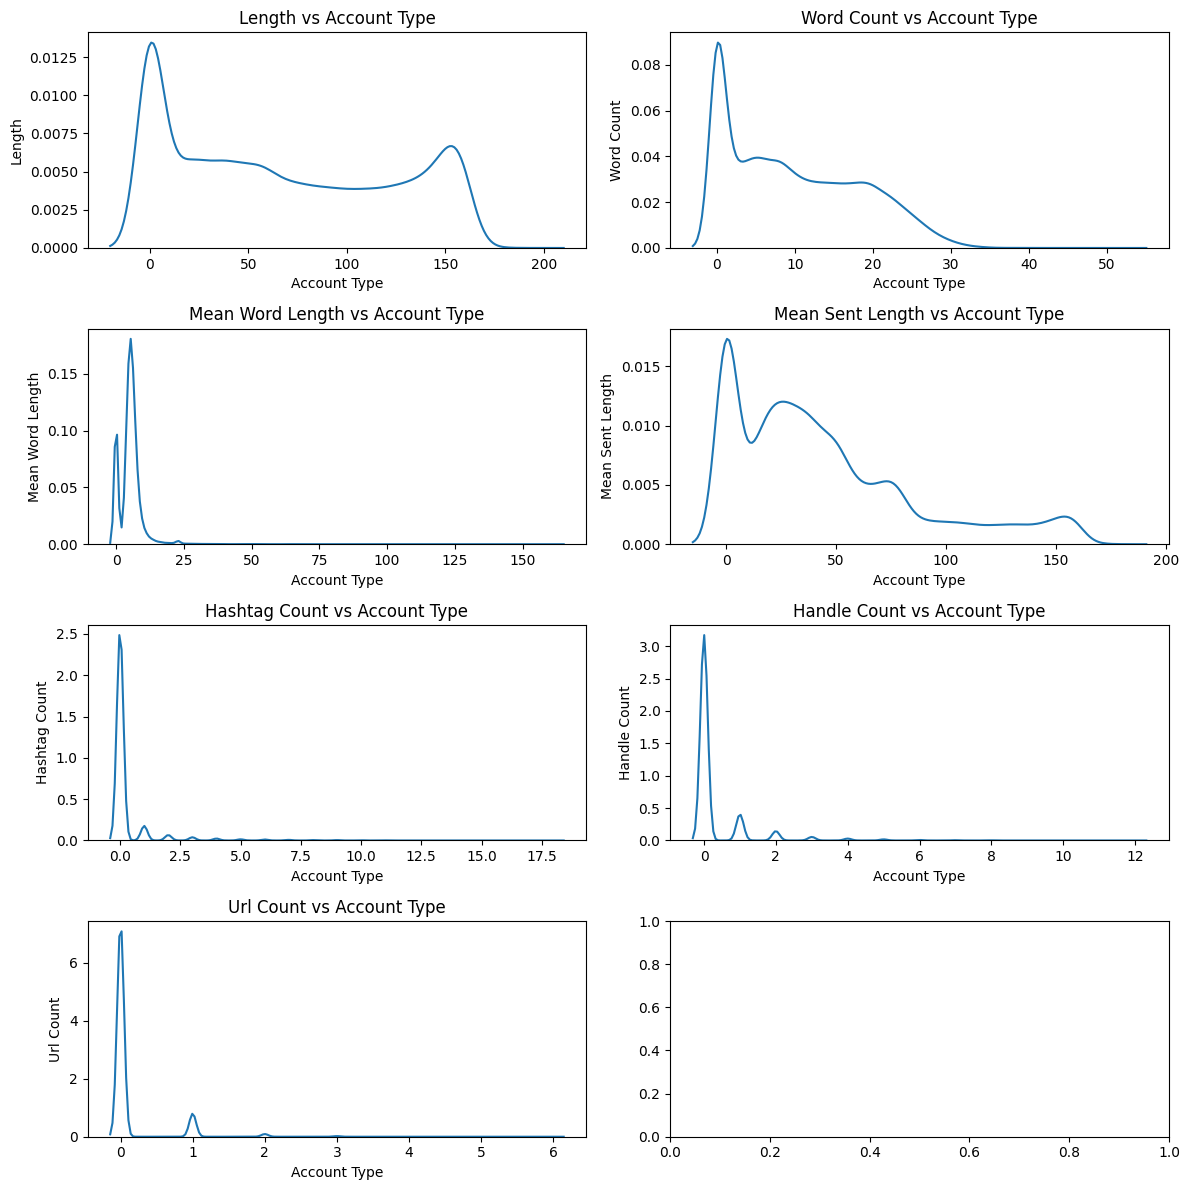

In [29]:
visualise_numerical_account_types(df)

Since the distributions are right-skewed and there are a lot of zeros, apply transformation.

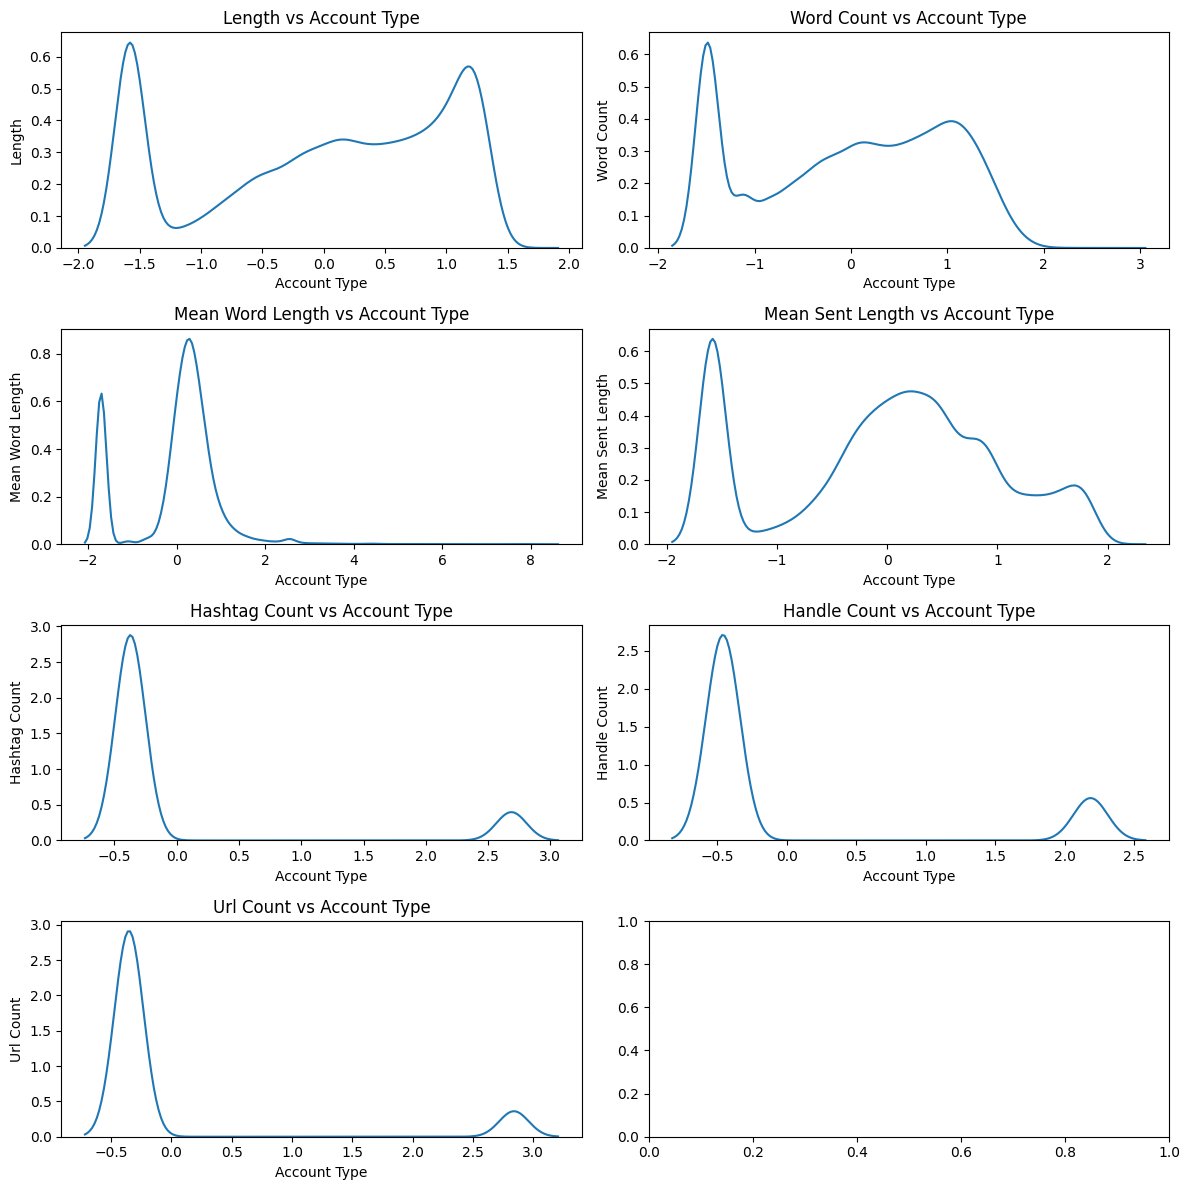

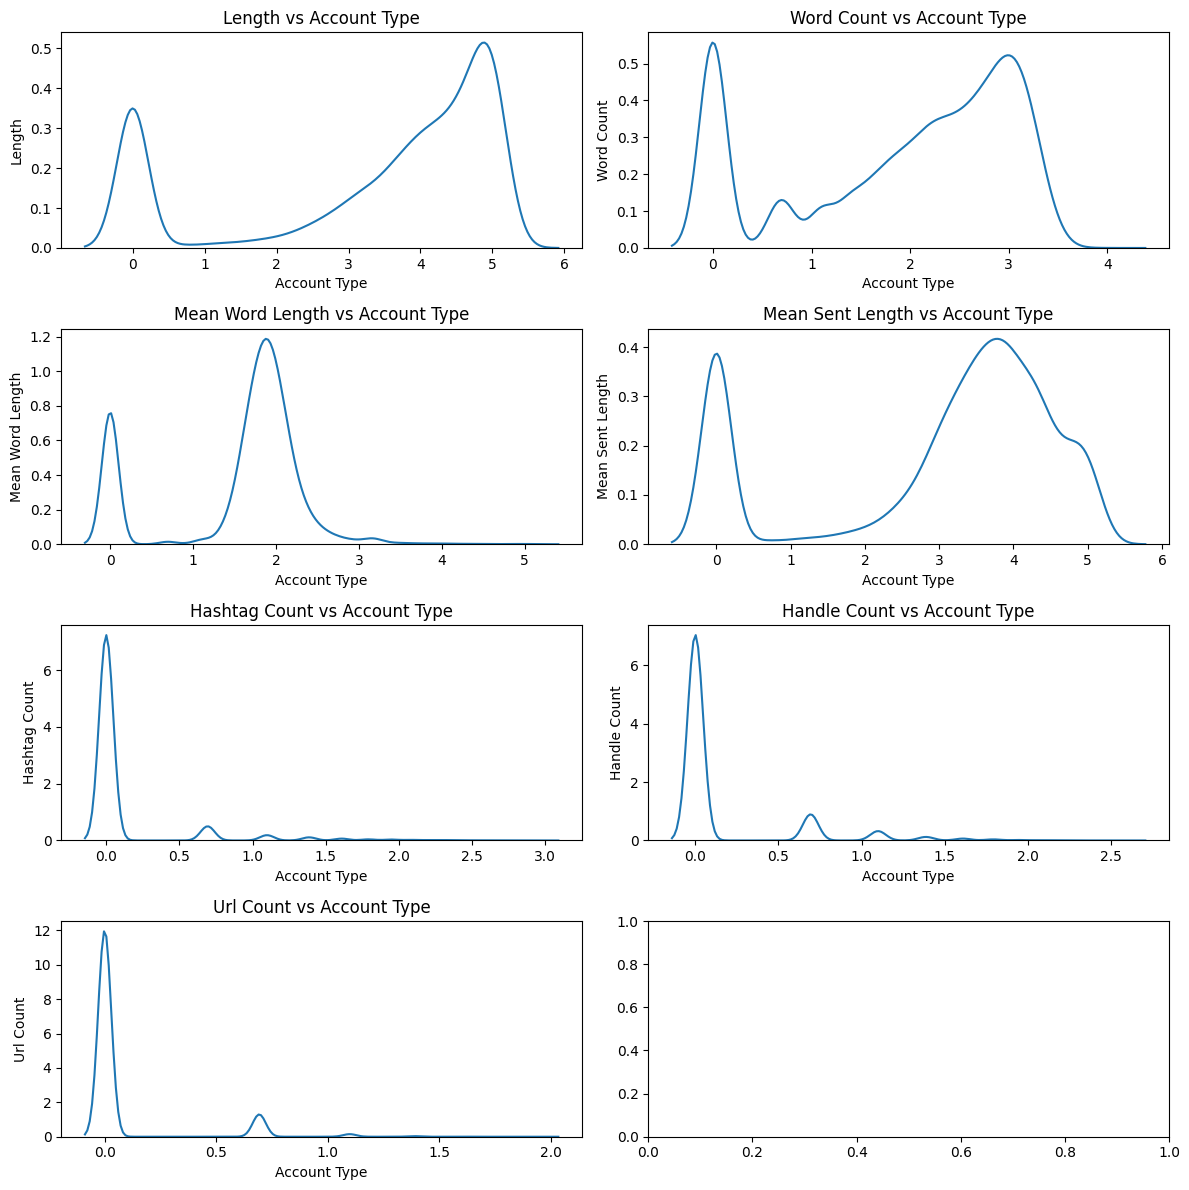

In [30]:
visualise_numerical_account_types(df, transformation="yeo-johnson")
visualise_numerical_account_types(df, transformation="log1p")

When examining the overall distributions of these features, they appear to be right-skewed — many accounts have short or minimal descriptions, while a few have very long ones, and do not have hashtags, handles and urls. 

Even after applying transformations (e.g., log, Yeo–Johnson), the distributions remain skewed, indicating that feature transformation may not substantially improve normality and may not be strictly necessary for downstream modeling — especially when using non-parametric or tree-based methods that are robust to non-normality.

<Axes: >

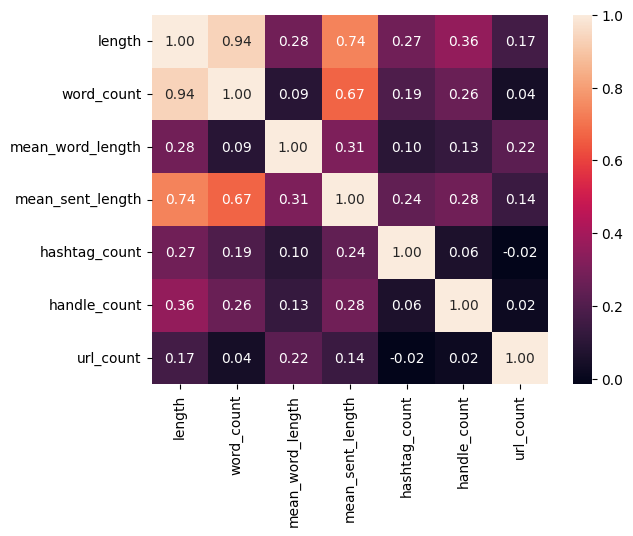

In [31]:
sns.heatmap(df[features].corr(), annot=True, fmt=".2f")

Due to the high correlation between:
- `length` and `word_count`
- `word_count` and  `mean_sent_length`
- `length` and `mean_sent_length`

choose either one for modelling to avoid overfitting.

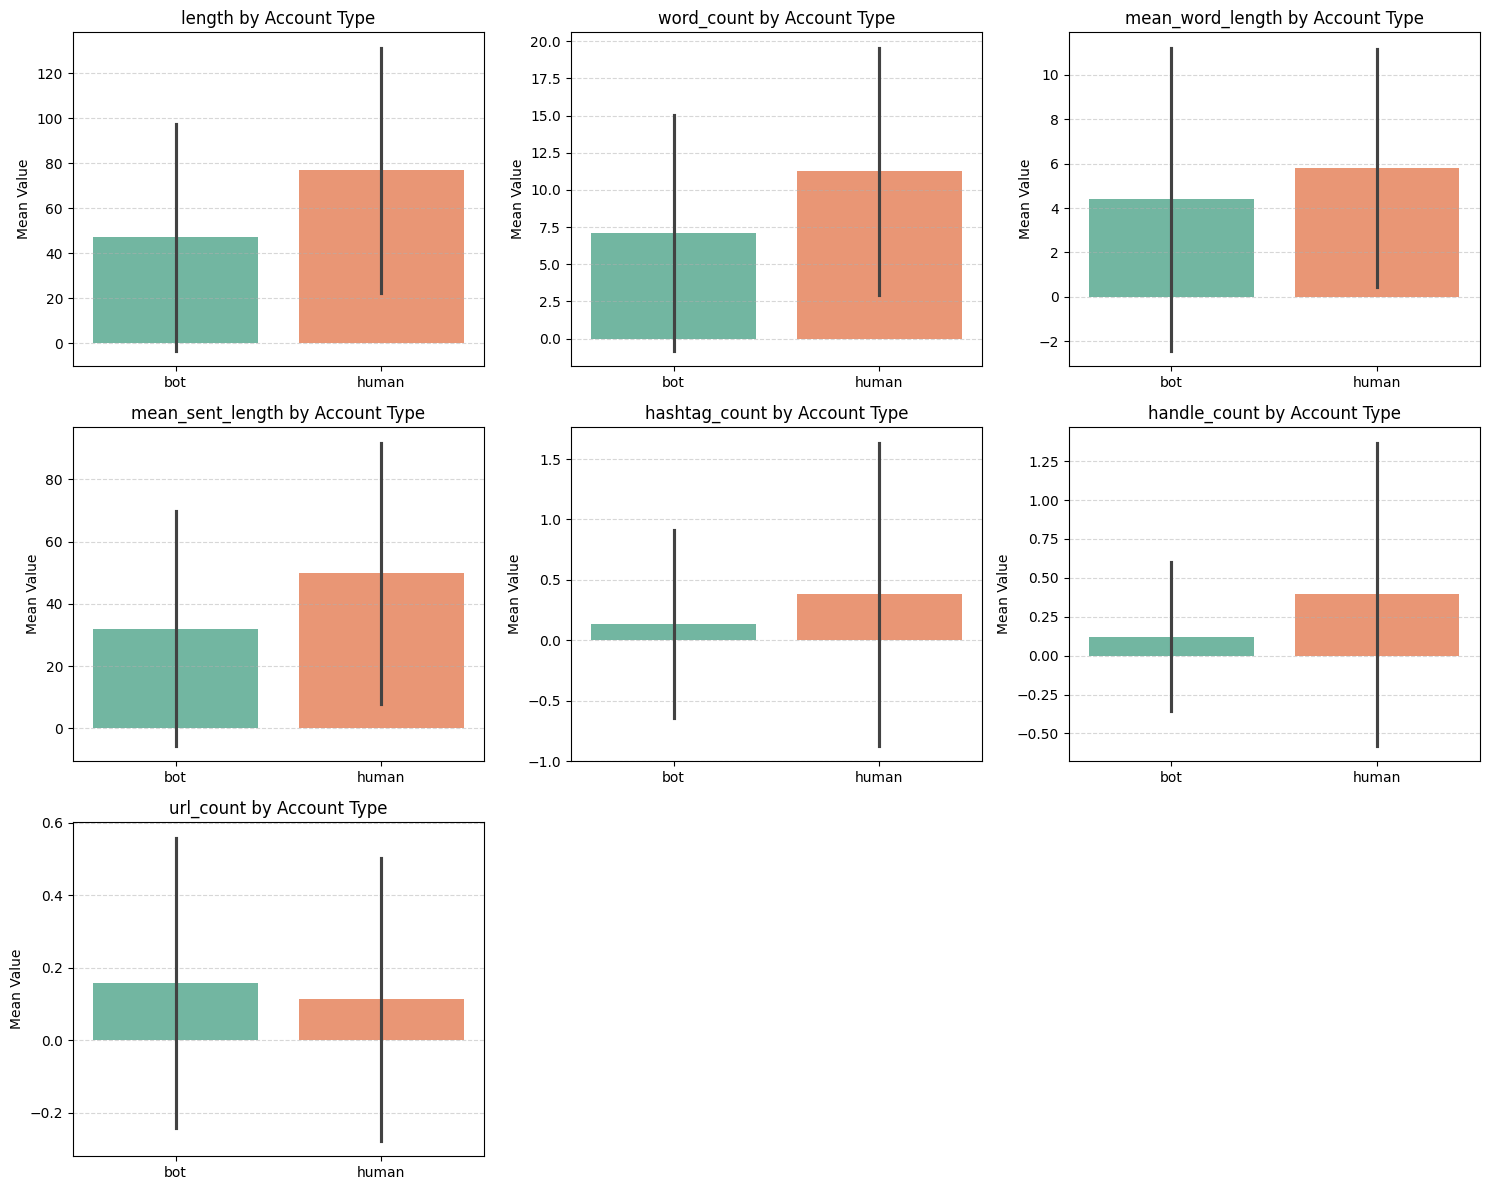

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each feature and make barplot
for i, feature in enumerate(features):
    ax = axes[i]
    sns.barplot(
        data=df,
        x="account_type",
        y=feature,
        errorbar="sd",  # show variability (can use "sd" or "se")
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"{feature} by Account Type", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Mean Value")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Profile descriptions written by human accounts tend to have greater length, more words per description, longer sentences, and include more hashtags and user mentions (handles) on average compared to bot accounts.

This suggests that humans generally write richer and more expressive profile descriptions, whereas bots tend to use shorter, more formulaic text, which relate to our hypothesis, Bots and humans use distinct language patterns in their profile descriptions, which we will discuss further. 

## Conclusion

In [33]:
df.to_csv('../data/interim/cleaned.csv', index=False)